# Sample 4.6 Run a Gibbs sampler using a 2D normal distribution as a sample

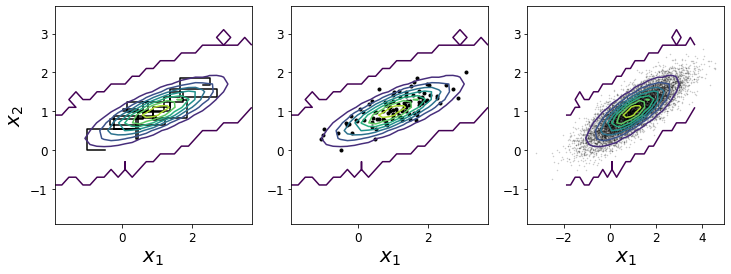

In [1]:
# Now do it with Gibbs sampler
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

mu = np.array([1.,1.])
s1 = 1. #sig_1**2
s2 = 0.2 #sig_2**2
rho = 0.8 
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]])
#generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu,sig,100000) 
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])

xx_g = np.zeros((100000,2))
xx_g1 = np.zeros((200000,2))

xx_g[0,0]=np.random.uniform(-3,3)
xx_g[0,1] = np.random.normal(mu[1]+rho*np.sqrt(s2/s1)*(xx_g[0,0]-\
            mu[0]),np.sqrt(s2*(1-rho**2)))
xx_g1[0,:] = xx_g[0]

for i in range(1,100000):
    #one step
    xx_g[i,0] = np.random.normal(mu[0]+rho*np.sqrt(s1/s2)*(xx_g[i-1,1]-mu[1]),\
                                 np.sqrt(s1*(1.-rho**2)))
    xx_g[i,1] = np.random.normal(mu[1]+rho*np.sqrt(s2/s1)*(xx_g[i,0]-mu[0]),\
                                 np.sqrt(s2*(1.-rho**2)))
    #below is for drawing the steps
    xx_g1[2*i-1,0] = xx_g[i,0]
    xx_g1[2*i-1,1] = xx_g[i-1,1]
    xx_g1[2*i,0] = xx_g[i,0]
    xx_g1[2*i,1] = xx_g[i,1]
    


fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(131)
#ax.plot(xx_g[0:10,0],xx_g[0:10,1],'k')
ax.plot(xx_g1[0:50,0],xx_g1[0:50,1],'k')
#ax.contour(xcenter,ycenter,hxx.T,colors='c')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(132)
ax.plot(xx_g[0:100,0],xx_g[0:100,1],'k.')
#ax.plot(xx_g1[0:200,0],xx_g1[0:200,1],'k')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(133)
ax.plot(xx_g[0:10000,0],xx_g[0:10000,1],'k.',markersize=1,alpha=0.2)
#ax.plot(xx_g1[0:2000,0],xx_g1[0:2000,1],'k')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)
# fig.show()

fig.savefig('Gibbs_sampler.png',bbox_inches='tight')